Martín Amado - 19020
Juan Pablo Pineda - 19087
Laura Tamath - 19365

# HOJA DE TRABAJO 4

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import statsmodels.stats.diagnostic as diag
import sklearn.cluster as cluster
from sklearn.metrics import silhouette_samples, silhouette_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn import metrics
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
import sklearn.preprocessing
import random
import graphviz
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot
from sklearn.cluster import Birch
import matplotlib.cm as cm
from scipy.stats import normaltest
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

C:\Users\laury\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [4]:
data = pd.read_csv('./HDT3/train.csv', encoding = "latin1")
file = open('./HDT3/cuantitativas.txt', 'r')
quant= file.read().splitlines()
file = open('./HDT3/cualitativas.txt', 'r')
quali= file.read().splitlines()

In [ ]:
#Variables cuantitativas
data[quant].describe()

In [ ]:
for var in quant:
    localData = data[var].dropna(how='all', axis=0)
  
    sns.displot(localData, kde=True)

    print( var, ':', ' Kurtosis:', stats.kurtosis(localData), 'Asimetría:', stats.skew(localData), '\n')

In [ ]:
#Variables cualitativas
for var in quali:
  data[var].value_counts().plot(kind='barh')
  plt.figure(figsize=(20,5))
  print(var)
  plt.show()

In [ ]:
# Variables de interes
print('\033[36m' + 'Kurtosis: %f' % data['SalePrice'].kurt())
print('\033[36m' + 'Asimetría: %f' % data['SalePrice'].skew())
data['SalePrice'].describe()

In [ ]:
stat,p = stats.shapiro(data[["SalePrice"]].dropna())
print('Prueba de Kolmogorov-Smirnov:\np=%f\n'% p)
ks_statistic, p_value = diag.lilliefors(data[["SalePrice"]].dropna())
print('Prueba de Lilliefors:\nks=%f\np=%f'%(ks_statistic,p_value))

In [ ]:
sns.displot(data['SalePrice'], kde=True)

### 1. Use los mismos conjuntos de entrenamiento y prueba que usó para los árboles de decisión en la hoja de trabajo anterior. 

In [7]:
data.fillna(0)
minPrice = data['SalePrice'].min()
maxPrice = data['SalePrice'].max()
divs = (maxPrice - minPrice) / 3
data['priceRange'] = data['LotArea']

data['priceRange'][data['SalePrice'] < minPrice + divs] = 'eco'
data['priceRange'][data['SalePrice'] >= minPrice + divs] = 'mid'
data['priceRange'][data['SalePrice'] >= minPrice + divs * 2] = 'expensive'

C:\Users\laury\AppData\Local\Temp\ipykernel_21736\1474497040.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['priceRange'][data['SalePrice'] < minPrice + divs] = 'eco'


In [8]:
PriceRange = data.pop('priceRange')
Y = data['SalePrice']
X = data.drop(['SalePrice'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, train_size=0.7)

### 2. Elabore  un  modelo  de  regresión  lineal  utilizando  el  conjunto  de  entrenamiento  que  hizo para  predecir  los  precios  de  las  casas
-Martín

In [ ]:
fig = plt.figure()
plt.scatter(data['LotArea'], data['SalePrice'])
plt.xlabel("Sale Price")
plt.ylabel("Lot Area")
plt.title("Sale Price vs Lot Area")

In [ ]:
s_prize = y_train.values.reshape(-1, 1)
s_prize_t = y_test.values.reshape(-1, 1)
l_area = X_train['LotArea'].values.reshape(-1, 1)
l_area_t = X_test['LotArea'].values.reshape(-1, 1)
lm = LinearRegression()
lm.fit(s_prize, l_area)
s_prize_pred = lm.predict(l_area_t)

In [ ]:
m = lm.coef_[0][0]
c = lm.intercept_[0]

label = r'$s_prize = %0.4f*l_area %+0.4f$'%(m, c)

In [ ]:
fig = plt.figure()
plt.scatter(l_area_t, s_prize_t)
plt.plot(s_prize_pred, l_area_t, color="red")
plt.ylabel("Sale Price")
plt.xlabel("Lot Area")
plt.title("Test Set Sale Price vs Lot Area")

In [ ]:
print("Mean Squared Error: %.2f"%metrics.mean_squared_error(s_prize_t,s_prize_pred))
print("R squared: %.2f"%metrics.r2_score(s_prize_t,s_prize_pred))

### 3.1 Determine si hay multicolinealidad en las variables, y cuáles son las que aportan  al  modelo,  por  su  valor  de  significación.  
-Pineda

### 3.2 Haga  un  análisis  de  correlación  de  las variables del modelo y especifique si el modelo se adapta bien a los datos. 
-Laura

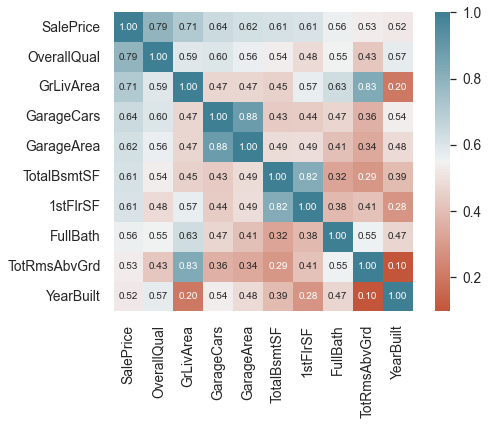

In [11]:
corrmat = data.corr()
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap = sns.diverging_palette(20, 220, n=200))
plt.show()

Como se puede observar en la gráfica, existen distintos tipos de valores y estos están representados por distintos colores, en donde el color rojo equivale a "asociación nula" y el color turquesa equivale a "asociación muy alta". 
Ahora bien, hablando de los datos en la gráfica, se puede apreciar que, las variables que pertenecen al mismo sector, están más correladas entre sí que las variables que no lo están. y donde se puede observar que las variables tienen una asociación prácticamente nuela, es en las variable: total de habitaciones - año de contrucción, pies cuadrados de superficie - año de construcción y pies cuadrados de superficie - año de construcción.

### 4. Determine la calidad del modelo realizando un análisis de los residuos. 
-Martín

In [ ]:
residuales = s_prize_t - s_prize_pred
len(residuales)

In [ ]:
plt.plot(l_area_t, residuales, 'o')
plt.title('Grafico de residuales')
plt.xlabel("Lot Area")
plt.ylabel("residuales")

El grafico muestra que los residuales estan organizados dentro del conjunto de datos, y no parece ser aleatorio

In [ ]:
sns.distplot(residuales)
plt.title("residuales")

In [ ]:
plt.boxplot(residuales)

In [ ]:
normaltest(residuales)

Los residuos siguen una distribucion normal, pero el valor de p es menor a 0.05

In [ ]:
model = sklearn.linear_model.Ridge()
visualizer = ResidualsPlot(model)
visualizer.fit(s_prize, l_area)
visualizer.score(s_prize_t, l_area_t)

### 5. Utilice  el  modelo  con  el  conjunto  de  prueba  y  determine  la  eficiencia  del  algoritmo  para predecir el precio de las casas
-Laura

In [ ]:
print('Train\n' , X_train, y_train)

In [ ]:
print('Test\n', X_test,y_test)

In [9]:
lireg=LinearRegression()
X = X_train.apply(pd.to_numeric, errors='coerce')
Y = y_train.apply(pd.to_numeric, errors='coerce')
xtest = X_test.apply(pd.to_numeric, errors='coerce')
X.fillna(0, inplace=True)
Y.fillna(0, inplace=True)
xtest.fillna(0, inplace=True)
model=lireg.fit(X,Y)
y_pred=lireg.predict(xtest)

In [10]:
print ('Score:', model.score(xtest, y_test))


Score: 0.8464697297103871


Como se puede observar, la proporción de la varianza total es de 0.84, el cual es más cercano a 1. Esto nos indica que algoritmo es fiable para poder predecir el precio de las casas.

### 6. Discuta sobre la efectividad del modelo. Haga los gráficos que crea que le pueden ayudar en la discusión. 
-Pineda

### 7. Compare la eficiencia del algoritmo con el resultado obtenido con el árbol de decisión (el de regresión). ¿Cuál es mejor para predecir? ¿Cuál se demoró más en procesar? 
-Martín

A pesar de un error en el valor del r2, el modelo de regresion lineal parece tener una mejor prediccion. De la misma manera, este toma una menor cantidad de tiempo de proceso en general